In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('altman.csv')
dlrsn = pd.read_csv('dlrsn_alt.csv')
dlrsn.drop(columns=['Unnamed: 0'], inplace=True)
dlrsn

,PERMCO,fyear,dlrsn
0,20000,2000,0.0
1,20000,2001,0.0
2,20000,2002,0.0
3,20000,2003,0.0
4,20000,2004,0.0
...,...,...,...
44701,54852,2018,0.0
44702,56329,2018,0.0
44703,56329,2019,0.0
44704,56407,2018,0.0


In [3]:
df.drop(columns=['GVKEY', 'datadate', 'indfmt', 'consol', 'popsrc','datafmt', 'curcd','dlrsn'], inplace=True)

In [4]:
df['WC/A'] = df['wcap']/df['at']
df['RE/A'] = df['reuna']/df['at']
df['EBITA/A'] = df['ebitda']/df['at']
df['MVE/BVL'] = df['mkvalt']/df['lt']
df['SALES/A'] = df['sale']/df['at']

In [5]:
df.drop(columns = ['at','ebitda','lt','reuna','sale','mkvalt','wcap','costat'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48566 entries, 0 to 48565
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LPERMCO  48566 non-null  int64  
 1   fyear    48565 non-null  float64
 2   conm     48566 non-null  object 
 3   WC/A     37028 non-null  float64
 4   RE/A     46401 non-null  float64
 5   EBITA/A  46422 non-null  float64
 6   MVE/BVL  45815 non-null  float64
 7   SALES/A  48493 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.0+ MB


In [7]:
df.columns = ['PERMCO','fyear','conm','WC/A','RE/A','EBITA/A','MVE/BVL','SALES/A']

In [8]:
df['altman'] = 1.2*df['WC/A'] + 1.4*df['RE/A'] + 3.3*df['EBITA/A'] + 0.6*df['MVE/BVL'] + 0.99*df['SALES/A'] 

In [9]:
def default(row):
    if row['altman'] < 1.8:
        val = 1.0
    else:
        val = 0.0
    return val

In [10]:
df['default'] = df.apply(default, axis=1)

In [11]:
df

,PERMCO,fyear,conm,WC/A,RE/A,EBITA/A,MVE/BVL,SALES/A,altman,default
0,20000,1999.0,AAR CORP,0.468896,0.284041,0.120150,0.928438,1.382369,3.282437,0.0
1,20000,2000.0,AAR CORP,0.513588,0.313239,0.091710,1.042794,1.245637,3.216340,0.0
2,20000,2001.0,AAR CORP,0.402974,0.220331,0.038309,0.911564,0.899355,2.355752,0.0
3,20000,2002.0,AAR CORP,0.280849,0.208662,0.044777,0.365979,0.883074,1.870742,0.0
4,20000,2003.0,AAR CORP,0.424286,0.206933,0.066955,0.757853,0.919167,2.384491,0.0
...,...,...,...,...,...,...,...,...,...,...
48561,54852,2018.0,DORIAN LPG LTD,0.001984,0.052293,0.041383,0.496962,0.098755,0.608097,1.0
48562,56329,2018.0,NVENT ELECTRIC PLC,0.084521,0.018319,0.101171,2.133604,0.486217,2.222452,0.0
48563,56329,2019.0,NVENT ELECTRIC PLC,0.072517,0.040234,0.098377,2.117214,0.474969,2.208541,0.0
48564,56407,2018.0,GRINDROD SHIPPING,0.148076,-0.015727,-0.005882,0.766867,0.712687,1.301942,1.0


In [12]:
df = pd.merge(df, dlrsn, on = ['PERMCO','fyear'], how = 'left')

In [13]:
df.dropna(subset=['dlrsn'], inplace=True)

In [14]:
df['dlrsn_lag'] = df.groupby(['PERMCO'])['dlrsn'].shift(-1)

In [15]:
df.dropna(subset=['dlrsn_lag'], inplace=True)

In [16]:
df

,PERMCO,fyear,conm,WC/A,RE/A,EBITA/A,MVE/BVL,SALES/A,altman,default,dlrsn,dlrsn_lag
1,20000,2000.0,AAR CORP,0.513588,0.313239,0.091710,1.042794,1.245637,3.216340,0.0,0.0,0.0
2,20000,2001.0,AAR CORP,0.402974,0.220331,0.038309,0.911564,0.899355,2.355752,0.0,0.0,0.0
3,20000,2002.0,AAR CORP,0.280849,0.208662,0.044777,0.365979,0.883074,1.870742,0.0,0.0,0.0
4,20000,2003.0,AAR CORP,0.424286,0.206933,0.066955,0.757853,0.919167,2.384491,0.0,0.0,0.0
5,20000,2004.0,AAR CORP,0.429533,0.221555,0.084364,1.251969,1.021329,2.866315,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48558,54852,2015.0,DORIAN LPG LTD,0.009342,0.084560,0.108329,0.599294,0.156037,1.001131,1.0,0.0,0.0
48559,54852,2016.0,DORIAN LPG LTD,-0.012481,0.089530,0.045269,0.751574,0.097271,0.806997,1.0,0.0,0.0
48560,54852,2017.0,DORIAN LPG LTD,0.030641,0.078302,0.039843,0.531255,0.093245,0.688939,1.0,0.0,0.0
48562,56329,2018.0,NVENT ELECTRIC PLC,0.084521,0.018319,0.101171,2.133604,0.486217,2.222452,0.0,0.0,0.0


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
f1 = f1_score(df.dlrsn_lag, df.default)
acc = accuracy_score(df.dlrsn_lag, df.default)
recall = recall_score(df.dlrsn_lag, df.default)
precision = precision_score(df.dlrsn_lag, df.default)
print(round(f1*100,2), round(acc*100,2), round(recall*100,2), round(precision*100,2))

1.9 83.17 46.53 0.97


In [18]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[34067  6831]
 [   77    67]]
Confusion matrix, without normalization
[[40898     0]
 [    0   144]]


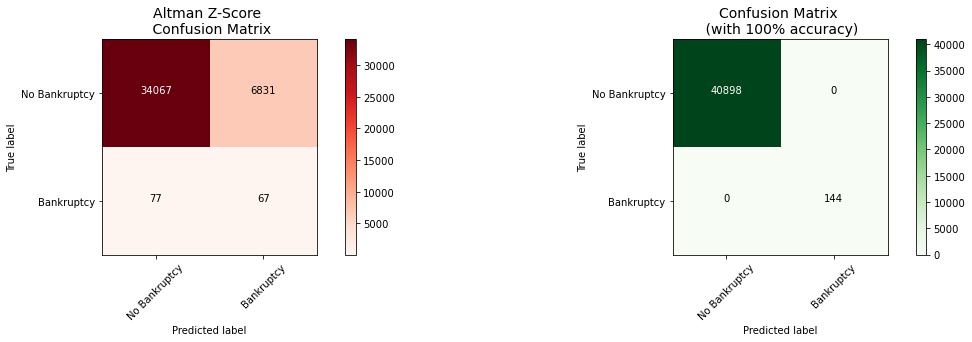

In [19]:
from sklearn.metrics import confusion_matrix
altman_cm = confusion_matrix(df.dlrsn_lag, df.default)
actual_cm = confusion_matrix(df.dlrsn_lag, df.dlrsn_lag)
labels = ['No Bankruptcy', 'Bankruptcy']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(altman_cm, labels, title="Altman Z-Score \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)